In [1]:
import perceval as pcvl
import sympy as sp
import numpy as np
from perceval.components import BS

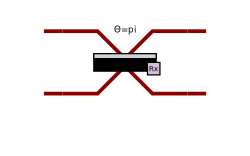

In [34]:
source = pcvl.Source() 
QPU = pcvl.Processor("Naive",2,source)
R = 0.0
QPU.add(0, pcvl.BS(BS.r_to_theta(R)))

pcvl.pdisplay(QPU, recursive = True)

In [ ]:
states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(QPU, states)

In [ ]:
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

In [33]:
pcvl.BS(BS.r_to_theta(0)).compute_unitary()

MatrixN([[6.123234e-17+0.j, 0.000000e+00+1.j],
         [0.000000e+00+1.j, 6.123234e-17+0.j]])

In [3]:
# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

state,probability
"|1,0>",1


In [4]:
# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1>",1


<h3> Using R = 0.01, a reflector with 99.99% accurate reflectivity and 0.01%  </h3>

In [5]:
source = pcvl.Source() 
QPU = pcvl.Processor("Naive",2,source)
R = 0.01
QPU.add(0, pcvl.BS(BS.r_to_theta(R)))

pcvl.pdisplay(QPU, recursive = True)

states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

,0,1
0,0.01,0.99
1,0.99,0.01


state,probability
"|1,0>",1


state,probability
"|0,1>",0.99
"|1,0>",0.01


In [6]:
arr = []
qubits = []
for x in range(1,16,2):
    print(x)
    qubits.append(x)
    source = pcvl.Source() 
    QPU = pcvl.Processor("Naive",2,source)
    R = 0.01
    for i in range(x):
        QPU.add(0, pcvl.BS(BS.r_to_theta(R)))

    # pcvl.pdisplay(QPU, recursive = True)

    states = {
        pcvl.BasicState([1, 0]): "0",
        pcvl.BasicState([0, 1]): "1",
    }

    ca = pcvl.algorithm.Analyzer(QPU, states)
    ca.compute(expected={"0": "0", "1": "1"})
    # pcvl.pdisplay(ca)

    # Gives the source distribution
    QPU.with_input(pcvl.BasicState([1, 0]))
    # pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

    # Gives the output distribution
    output_distribution=QPU.probs()["results"]
    # pcvl.pdisplay(output_distribution, max_v=10)
    arr.append(list(output_distribution.values())[1])
    print(list(output_distribution.values())[1])
    
print(arr)

1
0.99
3
0.912384
5
0.7694463744000001
7
0.5838284430950402
9
0.3849320864038259
11
0.20426248722624557
13
0.07043771007202791
15
0.004655599642401016
[0.99, 0.912384, 0.7694463744000001, 0.5838284430950402, 0.3849320864038259, 0.20426248722624557, 0.07043771007202791, 0.004655599642401016]


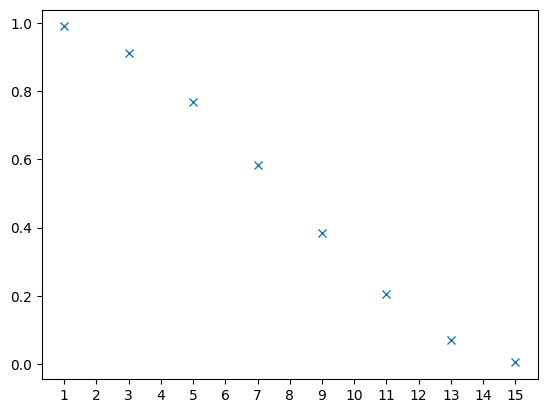

In [7]:
import matplotlib.pyplot as plt
plt.xticks(range(min(qubits), max(qubits)+1))
plt.plot(qubits,arr,'x')
plt.show()

In [8]:
out = []
for i in range(len(qubits)):
    u = [qubits[i],arr[i]]
    out.append(u)
print(out)

[[1, 0.99], [3, 0.912384], [5, 0.7694463744000001], [7, 0.5838284430950402], [9, 0.3849320864038259], [11, 0.20426248722624557], [13, 0.07043771007202791], [15, 0.004655599642401016]]


In [9]:
def Linear_extrapolation_(q, r):
    result = (q[0][1] + (r - q[0][0]) /
        (q[1][0] - q[0][0]) *
        (q[1][1] - q[0][1]));
 
    return result

In [10]:
Linear_extrapolation_(out,0)

1.028808

In [11]:
import numpy as np
p = np.polyfit(qubits,arr,deg=2)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([1.12066536])

In [12]:
import numpy as np
p = np.polyfit(qubits,arr,deg=3)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([0.99348603])

In [13]:
import numpy as np
p = np.polyfit(qubits,arr,deg=4)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([0.99240071])

In [14]:
import numpy as np
p = np.polyfit(qubits,arr,deg=5)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([1.00027095])

In [15]:
import numpy as np
p = np.polyfit(qubits,arr,deg=6)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([1.00032427])

<h3> Using R = 0.1, having a reflector with 99% accurate reflectivity and 0.1% error

In [16]:
source = pcvl.Source() 
QPU = pcvl.Processor("Naive",2,source)
R = 0.1
QPU.add(0, pcvl.BS(BS.r_to_theta(R)))

pcvl.pdisplay(QPU, recursive = True)

states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

,0,1
0,1/10,9/10
1,9/10,1/10


state,probability
"|1,0>",1


state,probability
"|0,1>",9/10
"|1,0>",1/10


In [17]:
arr = []
qubits = []
for x in range(1,16,2):
    print(x)
    qubits.append(x)
    source = pcvl.Source() 
    QPU = pcvl.Processor("Naive",2,source)
    R = 0.1
    for i in range(x):
        QPU.add(0, pcvl.BS(BS.r_to_theta(R)))

    # pcvl.pdisplay(QPU, recursive = True)

    states = {
        pcvl.BasicState([1, 0]): "0",
        pcvl.BasicState([0, 1]): "1",
    }

    ca = pcvl.algorithm.Analyzer(QPU, states)
    ca.compute(expected={"0": "0", "1": "1"})
    # pcvl.pdisplay(ca)

    # Gives the source distribution
    QPU.with_input(pcvl.BasicState([1, 0]))
    # pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

    # Gives the output distribution
    output_distribution=QPU.probs()["results"]
    # pcvl.pdisplay(output_distribution, max_v=10)
    arr.append(list(output_distribution.values())[1])
    print(list(output_distribution.values())[1])
    
print(arr)

1
0.9
3
0.324
5
0.0014400000000000081
7
0.3968064000000002
9
0.9407715840000002
11
0.8500256870399997
13
0.25524280074239963
15
0.012910281375744126
[0.9, 0.324, 0.0014400000000000081, 0.3968064000000002, 0.9407715840000002, 0.8500256870399997, 0.25524280074239963, 0.012910281375744126]


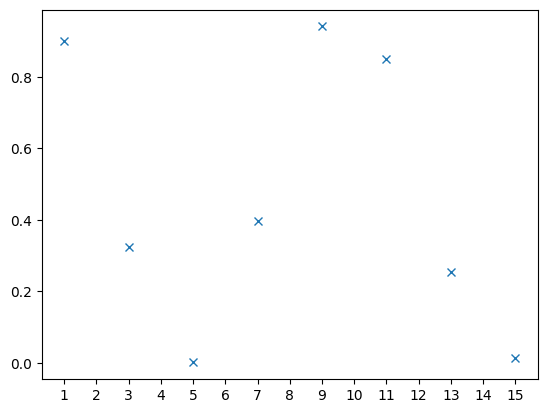

In [18]:
import matplotlib.pyplot as plt
plt.xticks(range(min(qubits), max(qubits)+1))
plt.plot(qubits,arr,'x')
plt.show()

In [19]:
out = []
for i in range(len(qubits)):
    u = [qubits[i],arr[i]]
    out.append(u)
print(out)

[[1, 0.9], [3, 0.324], [5, 0.0014400000000000081], [7, 0.3968064000000002], [9, 0.9407715840000002], [11, 0.8500256870399997], [13, 0.25524280074239963], [15, 0.012910281375744126]]


In [20]:
Linear_extrapolation_(out,0)

1.1880000000000002

In [21]:
import numpy as np
p = np.polyfit(qubits,arr,deg=2)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([0.47966333])

In [22]:
import numpy as np
p = np.polyfit(qubits,arr,deg=3)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([1.39587952])

In [23]:
import numpy as np
p = np.polyfit(qubits,arr,deg=4)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([1.94891638])

In [24]:
import numpy as np
p = np.polyfit(qubits,arr,deg=5)
x_new = np.array([0])
y_new = np.polyval(p,x_new)
y_new

array([0.81117343])

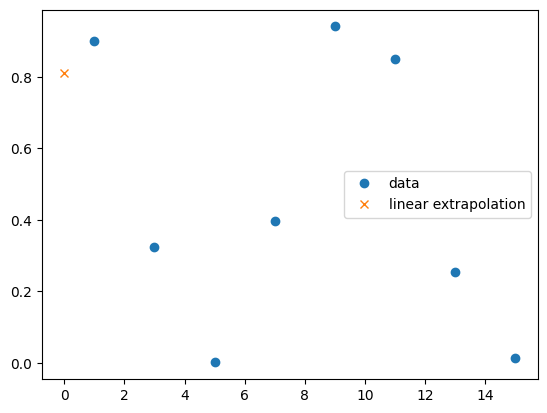

In [25]:
plt.plot(qubits,arr, 'o', label='data')
plt.plot(x_new, y_new, 'x', label='linear extrapolation')
plt.legend()
plt.show()